In [17]:
"""Build a language detector model

The goal of this exercise is to train a linear classifier on text features
that represent sequences of up to 3 consecutive characters so as to be
recognize natural languages by using the frequencies of short character
sequences as 'fingerprints'.

"""
# Author: Olivier Grisel <olivier.grisel@ensta.org>
# License: Simplified BSD

import sys

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Perceptron
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics


# The training data folder must be passed as first argument
languages_data_folder = 'data/languages/paragraphs/'
dataset = load_files(languages_data_folder)

# Split the dataset in training and test set:
docs_train, docs_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=0.5)

In [18]:
# TASK: Build a vectorizer that splits strings into sequence of 1 to 3
# characters instead of word tokens
split13 = TfidfVectorizer(ngram_range=(1, 3), analyzer='char', use_idf=False)

In [19]:
# TASK: Build a vectorizer / classifier pipeline using the previous analyzer
# the pipeline instance should stored in a variable named clf
clf = Pipeline([('vec', split13), ('clf', Perceptron(tol=1e-4))])

In [20]:
# TASK: Fit the pipeline on the training set
clf.fit(docs_train, y_train)

Pipeline(memory=None,
     steps=[('vec', TfidfVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
   ...jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=0.0001, verbose=0, warm_start=False))])

In [21]:
# TASK: Predict the outcome on the testing set in a variable named y_predicted
y_predicted = clf.predict(docs_test)

In [22]:
# Print the classification report
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=dataset.target_names))

             precision    recall  f1-score   support

         ar       1.00      1.00      1.00        17
         de       1.00      0.97      0.98        64
         en       1.00      1.00      1.00        82
         es       1.00      0.99      0.99        70
         fr       0.98      1.00      0.99        61
         it       0.98      1.00      0.99        47
         ja       1.00      1.00      1.00        31
         nl       1.00      1.00      1.00        21
         pl       0.95      1.00      0.98        21
         pt       1.00      1.00      1.00        46
         ru       1.00      1.00      1.00        30

avg / total       0.99      0.99      0.99       490



In [13]:
# Plot the confusion matrix
cm = metrics.confusion_matrix(y_test, y_predicted)
print(cm)

[[16  0  0  0  0  0  0  0  0  0  0]
 [ 0 73  0  0  0  0  0  0  0  0  0]
 [ 0  0 77  0  0  0  0  0  0  0  0]
 [ 0  0  1 55  0  0  0  0  0  0  0]
 [ 0  0  0  0 61  0  0  0  0  0  0]
 [ 0  0  0  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0  0 34  0  1  0  0]
 [ 0  0  0  0  0  0  0 23  2  0  0]
 [ 0  0  0  0  0  0  0  0 18  0  0]
 [ 0  0  0  0  0  0  0  0  0 53  0]
 [ 0  0  0  0  0  0  0  0  0  0 37]]


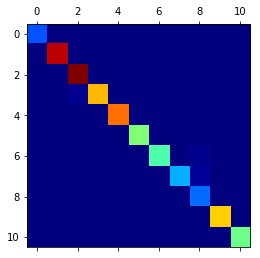

In [23]:
import matplotlib.pyplot as plt
plt.matshow(cm, cmap=plt.cm.jet)
plt.show()

In [24]:
# Predict the result on some short new sentences:
sentences = [
    u'This is a language detection test.',
    u'Ceci est un test de d\xe9tection de la langue.',
    u'Dies ist ein Test, um die Sprache zu erkennen.',
]
predicted = clf.predict(sentences)

for s, p in zip(sentences, predicted):
    print(u'The language of "%s" is "%s"' % (s, dataset.target_names[p]))

The language of "This is a language detection test." is "fr"
The language of "Ceci est un test de détection de la langue." is "fr"
The language of "Dies ist ein Test, um die Sprache zu erkennen." is "de"
